# Data Scientist Candidate Homework  <img style="float: right;" src="./Data/Trupanion_Logo.jpg">  
  
---  

### Submitted by: Heather M. Steich, M.S.
### Date: October 16$^{th}$, 2017
### Written in: Python 3.4.5

In [1]:
import sys
print(sys.version)

3.4.5 |Anaconda custom (64-bit)| (default, Jul  5 2016, 14:53:07) [MSC v.1600 64 bit (AMD64)]


---  
  
## Part 1:  

As an insurance company, we collect premiums on a monthly basis from customers.  In return, we pay the customers' veterinary bills, should their pets receive medical treatment.  

**Trupanion's Questions:**  

 - How would you estimate the remaining “value” of a customer (total premium collected minus total costs)?  
 - How could we, as a company, use this estimate?

**Heather's Responses:**  

At first glance, the idea of remaining customer *value* seems like a simple mathematical calculation.  Aggregate a customer's premiums and claims over time, then subtract the paid claims from the collected premiums.  This would require about three lines of code, and you could flag each customer according to their positive or negative *value* for any pre-defined period (e.g. over a month, quarter or year).  Although this is a good insight, there are much more sophisticated and accurate evaluations for this metric.

"Customer Lifetime Value" (CLV) is a well-documented topic and is utilized by businesses across disparate industries.  Following is a definition of CLV:

> "[Customer lifetime value] is a prediction of the net profit attributed to the entire future relationship with a customer. The prediction model can have varying levels of sophistication and accuracy, ranging from a crude heuristic to the use of complex predictive analytics techniques.

> "Customer lifetime value can also be defined as the dollar value of a customer relationship, based on the present value of the projected future cash flows from the customer relationship. Customer lifetime value is an important concept in that it encourages firms to shift their focus from quarterly profits to the long-term health of their customer relationships. Customer lifetime value is an important number because it represents an upper limit on spending to acquire new customers. For this reason, it is an important element in calculating payback of advertising spent in marketing mix modeling."   *[Source](https://en.wikipedia.org/wiki/Customer_lifetime_value)*  
  
Given this description, one can see that a customer's remaining *value* is more wholistic than simple subtraction.  For example, a longtime customer may insure future pets, they may refer friends and acquaintances to sign up for a policy.  A customer could also have an unpleasant experience with your coverage and spread negative information that could hinder other potential clients.  In these examples, the positive and negative values are much further reaching than the ratio of premium to claims.  

Therefore, my estimate for remaining customer *value* would include both the present value (i.e. literal, dollar amount) plus a model for the projected value of the customer in the future.  There are many approaches to these analytics, and I cannot make specific, detailed recommendations without a much deeper look into your data to see which features are captured, the history and covariances between variables, and so on.  

As a high-level overview, I would propose a personalized and dynamic Data Science solution to this estimate. I believe that I will need to look at marketing budgets and campaigns to obtain the cost of acquiring a new customer, the cost of retaining them, and what motivators reduce the likelihood of them cancelling their policy (i.e. churn).  I would need to look at features like species, age and breed of the customer's pets to estimate the risk of the pet inccuring a higher claim frequency and/or amount.  I'm sure that you already have algorithms in place for these calculations in order to quote premium rates.  It would also be great to obtain outside date from veterinarian databases to assist in risk and cost projections.  Given enough information and tuning, the *value* estimate could be a critical figure for the bottom line of your business decisions at Trupanion.  
  
There are so many potential things that Trupanion could do with this *value* estimate!  Because this is a dynamic/fluid Data Science model, features can be altered, added or removed to get a more accurate prediction over time.  Different approaches to increase the value estimate such as promotions, successful referral benefits, and anniversary loyalty points could all be A/B tested against other campaigns to see what works best.  The estimated customer *value* could provide ideas for where to expand the business geographically.  It can be used to find the best ways to acquire and retain new customers.  Ultimately, the business decisions can work towards steadily increasing the average customer *value* to drive a stronger bottom line at Trupanion.  
  
This will benefit our employers, shareholders, veterinarians, customers and their pets.  I look forward to the opportunity to join Trupanion and assist in your mission "to help the pets we all love receive the best veterinary care."  My background in prevention-focused healthcare, my strong analytical abilities, and my love of animals make me a strong candidate for the role of Data Scientist at Trupanion.

---  
  
## Part 2:  

**Trupanion's Request:**  
The attached *$*$.csv* files contain example data from 2016.  Build a model to predict either:  
> a. Future cancels  
> b. Future claims paid out  
  
If you choose to predict cancels, the output should be a probability of cancellation for each policy in the following month (January 2017).  
  
If you choose to predict claims paid out, the output should be an estimated dollar amount paid out for each policy in the following month (January 2017).  

It might help to transform the data to a monthly per policy basis before training.  
  
Please include your code in the submission. 


**Heather's Approach:**

 - Step 1: Load the Python libraries & visualization templates

In [2]:
## LOAD LIBRARIES

# Data wrangling & processing: 
import numpy as np
import pandas as pd

# Machine learning:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import confusion_matrix
from pandas_ml import ConfusionMatrix
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestRegressor as RFR

# Plotting:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Remove warning messages:
#import warnings
#warnings.filterwarnings('ignore')

In [3]:
## ESTABLISH PLOT FORMATTING

#mpl.rcdefaults()  # Resets plot defaults

def plt_format():
    %matplotlib inline
    plt.rcParams['figure.figsize'] = (16, 10)
    plt.rcParams['font.size'] = 16
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['axes.labelcolor'] = 'black'
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['axes.titlesize'] = 32
    plt.rcParams['axes.titleweight'] = 'bold'
    plt.rcParams['legend.fontsize'] = 16
    plt.rcParams['legend.markerscale'] = 4
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams['legend.fontsize'] = 16
    plt.rcParams['legend.frameon'] = False
    plt.rcParams['axes.linewidth'] = 1

#plt.rcParams.keys()  # Available rcParams
plt_format()

 - Step 2: Load, view & prepare the provided data

In [4]:
## LOAD DATA:

# Read in the CSV files:
claim_df = pd.read_csv("./Data/ClaimLevel.csv")
policy_df = pd.read_csv("./Data/PolicyLevel.csv")

# Print shapes:
print('Claim Shape:', claim_df.shape)
print('Claim Column Names:', claim_df.columns)
print('\nPolicy Shape:', policy_df.shape)
print('Policy Column Names:', policy_df.columns)

Claim Shape: (144910, 4)
Claim Column Names: Index(['PolicyId', 'ClaimDate', 'ClaimedAmount', 'PaidAmount'], dtype='object')

Policy Shape: (100000, 4)
Policy Column Names: Index(['PolicyId', 'EnrollDate', 'CancelDate', 'MonthlyPremium'], dtype='object')


In [5]:
## PRINT A PREVIEW OF THE DATAFRAMES:

claim_df.head()

,PolicyId,ClaimDate,ClaimedAmount,PaidAmount
0,148971,2016-02-11,924.39,814.27
1,566332,2016-01-20,155.43,0.00
2,221990,2016-01-14,1579.88,1136.89
3,568257,2016-01-13,220.33,39.89
4,403218,2016-01-08,46.11,13.87


In [6]:
policy_df.head()

,PolicyId,EnrollDate,CancelDate,MonthlyPremium
0,92597,2010-12-07,NaN,34.54
1,92808,2010-11-09,NaN,18.54
2,93090,2010-11-11,NaN,23.53
3,93122,2010-11-11,NaN,44.02
4,93133,2010-11-11,NaN,32.46


In [7]:
## CONVERT THE DATE COLUMNS TO DATETIME OBJECTS:

claim_df.ClaimDate = pd.to_datetime(claim_df.ClaimDate)
policy_df.EnrollDate = pd.to_datetime(policy_df.EnrollDate)
policy_df.CancelDate = pd.to_datetime(policy_df.CancelDate)

 - Step 3: Data exploration

In [8]:
## BASIC STATISTICS FOR THE CLAIMS DATA:

claim_df.describe()

,PolicyId,ClaimedAmount,PaidAmount
count,1.449100e+05,144910.000000,144910.000000
mean,4.162606e+05,176.770767,96.793884
std,2.810273e+05,370.909315,300.576903
min,1.000000e+01,-80.570000,0.000000
25%,1.610410e+05,35.970000,0.000000
50%,3.881680e+05,79.710000,21.260000
75%,6.729440e+05,173.297500,73.970000
max,1.003050e+06,30707.430000,27164.080000


In [9]:
## THERE WAS ONE NEGATIVE CLAIM:

claim_df[claim_df.ClaimedAmount < 0]

,PolicyId,ClaimDate,ClaimedAmount,PaidAmount
140342,777949,2016-12-16,-80.57,0.0


In [10]:
## IT SEEMS LIKE THIS WAS A REVERSAL OF A CHARGE ON THE SAME DAY:

claim_df[claim_df.PolicyId == 777949]

,PolicyId,ClaimDate,ClaimedAmount,PaidAmount
26376,777949,2016-03-16,663.75,221.37
140342,777949,2016-12-16,-80.57,0.00
140343,777949,2016-12-16,268.57,151.71


In [11]:
## BASIC STATISTICS FOR THE POLICY DATA:

policy_df.describe()

,PolicyId,MonthlyPremium
count,1.000000e+05,99995.000000
mean,5.384299e+05,27.429644
std,3.023533e+05,13.084535
min,4.000000e+00,5.700000
25%,2.741485e+05,18.530000
50%,5.711715e+05,24.750000
75%,8.065292e+05,32.990000
max,1.027568e+06,171.610000


In [12]:
## VIEW POLICIES THAT DO NOT HAVE AN ASSIGNED MONTHLY PREMIUM:

policy_df[policy_df.MonthlyPremium.isnull()]

,PolicyId,EnrollDate,CancelDate,MonthlyPremium
9932,853115,2016-04-19,2016-04-19,NaN
19108,26042,2009-03-05,2016-01-06,NaN
24364,34475,2010-01-14,NaT,NaN
81853,823753,2016-02-12,2016-10-12,NaN
84772,458540,2014-03-27,2016-10-12,NaN


In [13]:
## CHECK THE DATE RANGES TO MAKE SURE THIS IS ALL 2016 DATA:

print("Earliest Date of Claims", claim_df.ClaimDate.min())
print("Latest Date of Claims", claim_df.ClaimDate.max())
print("\nEarliest Date of Policy Enrollment", policy_df.EnrollDate.min())
print("Latest Date of Policy Enrollment", policy_df.EnrollDate.max())
print("\nEarliest Date of Policy Cancel", policy_df.CancelDate.min())
print("Latest Date of Policy Cancel", policy_df.CancelDate.max())

Earliest Date of Claims 2016-01-01 00:00:00
Latest Date of Claims 2016-12-31 00:00:00

Earliest Date of Policy Enrollment 2000-12-08 00:00:00
Latest Date of Policy Enrollment 2016-12-31 00:00:00

Earliest Date of Policy Cancel 2016-01-01 00:00:00
Latest Date of Policy Cancel 2016-12-31 00:00:00


In [14]:
## MANY CUSTOMERS ENROLLED LONG BEFORE 2016:  

print("Number of Policy Holders Enrolled Prior to 2016:", 
      policy_df[policy_df.EnrollDate < '2016'].shape[0])
policy_df[policy_df.EnrollDate < '2016'].head()

Number of Policy Holders Enrolled Prior to 2016: 73883


,PolicyId,EnrollDate,CancelDate,MonthlyPremium
0,92597,2010-12-07,NaT,34.54
1,92808,2010-11-09,NaT,18.54
2,93090,2010-11-11,NaT,23.53
3,93122,2010-11-11,NaT,44.02
4,93133,2010-11-11,NaT,32.46


In [15]:
## COUNT OF UNIQUE POLICY ID'S:

print("Unique Policy ID's:", policy_df.PolicyId.unique().shape[0])
print("Number of Duplicated Rows:", sum(policy_df.duplicated()))

Unique Policy ID's: 100000
Number of Duplicated Rows: 0


In [16]:
## COUNT OF UNIQUE POLICY ID'S THAT FILED CLAIMS:

print("Unique Policy ID's That Filed Claims:", 
      claim_df.PolicyId.unique().shape[0])
print("Number of Duplicated Rows:", sum(claim_df.duplicated()))

Unique Policy ID's That Filed Claims: 31526
Number of Duplicated Rows: 3744


**Key finding:**  
  
**There are 3,744 claims that have duplicates; resulting in 6,616 rows (4.255%) are duplicates of another.**  
  
**This would be a pivotal time to reach out to check that these are in-fact valid claims.  Due to this being a homework assignment, I will make the executive decision that these *are* valid claims.  For example, perhaps the animal went to the veterinarian for two vaccines, which resulted in two identical claim amounts on the same day.**  

**Please note that this is an assumption, and in the real world I would ask for further clarification prior to proceeding with analyses.**  

In [17]:
## MANY CLAIMS ARE DUPLICATED:

print("Duplicated Claims Account for", 
      claim_df[claim_df.duplicated(keep=False)].shape[0],
      "Rows of the Claims Data.  This is",
      round(claim_df[claim_df.duplicated(keep=False)].shape[0] 
      / claim_df.shape[0] * 100, 3), "% of the Claims Data.")
claim_df[claim_df.duplicated(keep=False)].head(10)

Duplicated Claims Account for 6166 Rows of the Claims Data.  This is 4.255 % of the Claims Data.


,PolicyId,ClaimDate,ClaimedAmount,PaidAmount
58,723096,2016-01-04,12.86,0.00
59,723096,2016-01-04,12.86,0.00
142,166302,2016-01-06,25.43,22.89
143,166302,2016-01-06,25.43,22.89
144,166302,2016-01-06,25.43,22.89
156,11563,2016-01-08,38.75,34.87
331,242712,2016-01-12,37.26,33.54
339,242712,2016-01-12,37.26,33.54
346,11446,2016-01-11,48.33,43.50
347,11446,2016-01-11,48.33,43.50


 - Step 4: Transform & merge the data to a monthly-per-policy basis

In [18]:
## ADD A LEVEL TO COLUMN INDEX TO ALIGN WITH THE MONTHLY CLAIMS DATA:

# Re-assign DataFrame to another name:
reindex_policy = pd.DataFrame(policy_df)

# Reset the index level to prevent an error from occurring if 
# this cell is run more than once:
try:
    reindex_policy = reindex_policy[list(policy_df.columns.levels[0].values)]
except: 
    reindex_policy = policy_df[list(policy_df.columns.values)]

# Add extra level to column index:
reindex_policy.columns = pd.MultiIndex.from_arrays([reindex_policy.columns, 
                    [' '] * len(reindex_policy.columns)])

# Print preview of re-indexed policy DataFrame:
reindex_policy.head()

,PolicyId,EnrollDate,CancelDate,MonthlyPremium
,,,,
0,92597,2010-12-07,NaT,34.54
1,92808,2010-11-09,NaT,18.54
2,93090,2010-11-11,NaT,23.53
3,93122,2010-11-11,NaT,44.02
4,93133,2010-11-11,NaT,32.46


In [19]:
## PIVOT & MERGE THE TWO DATAFRAMES TO GET A MORE COMPLETE PICTURE OF 
## CLAIMS BEHAVIOUR, ADDING ADDITION METRICS (FEATURES) FOR MODELLING:

# Pivot the claim DataFrame to have one row per policy, & a column
# for every month's ClaimedAmount & PaidAmount; if not claim data, 
# fill as '$0' claim:
pivot_df = pd.pivot_table(claim_df,index=claim_df['PolicyId'],
               columns=claim_df['ClaimDate'].dt.month,
               aggfunc=np.sum, fill_value=0).reset_index()

# Merge the Claims and Policy DataFrames together in an 'left' join on PolicyId:
wide_df = reindex_policy.join(pivot_df.set_index('PolicyId'))

# Fill in missing amounts with zeros:
wide_df['ClaimedAmount'] = wide_df.ClaimedAmount.fillna(0)
wide_df['PaidAmount'] = wide_df.PaidAmount.fillna(0)

# Calculate basic metrics for each policy:
wide_df['MeanClaims'] = np.mean(wide_df.ClaimedAmount, axis=1)
wide_df['MeanPaid'] = np.mean(wide_df.PaidAmount, axis=1)
wide_df['MedianClaims'] = np.median(wide_df.ClaimedAmount, axis=1)
wide_df['MedianPaid'] = np.median(wide_df.PaidAmount, axis=1)
wide_df['TotalClaims'] = np.sum(wide_df.ClaimedAmount, axis=1)
wide_df['TotalPaid'] = np.sum(wide_df.PaidAmount, axis=1)
wide_df['TotalDifference'] =  (np.sum(wide_df.ClaimedAmount, axis=1) - 
                               np.sum(wide_df.PaidAmount, axis=1))
wide_df['ProportionCovered'] =  (np.sum(wide_df.PaidAmount, axis=1) / 
                                    np.sum(wide_df.ClaimedAmount, axis=1))

# Since we only have claims for 2016, calculate the number of months &  
# paid premiums in 2016 alone:
wide_df['Premiums2016'] = (np.where(pd.to_datetime(pd.Series(wide_df['CancelDate'])).dt.year == 2016,
         pd.to_datetime(pd.Series(wide_df['CancelDate'])).dt.month, 12) 
         - np.where(pd.to_datetime(pd.Series(wide_df['EnrollDate'])).dt.year == 2016, 
         pd.to_datetime(pd.Series(wide_df['EnrollDate'])).dt.month, 0))
wide_df['PremiumsPaid2016'] = np.multiply(wide_df.Premiums2016.values, 
                                       wide_df.MonthlyPremium.iloc[0:, 0].values)
wide_df['PremiumVPaid'] = (wide_df.PremiumsPaid2016.values - wide_df.TotalPaid.values)

# Use a binary key to mark if the customer is current or canceled at the end of 2016:
wide_df['Churned'] = np.where(wide_df.CancelDate.fillna(0) 
                                       > pd.datetime(2016, 1, 1), 1, 0)

# Calculate the total number of months the customer has held a policy:
end = pd.to_datetime('2016-12-31')
wide_df['PolicyLength'] = (wide_df.CancelDate.fillna(end) - 
                           wide_df.EnrollDate).astype('timedelta64[M]')

# Print a preview of the prepared DataFrame:
wide_df.head()

PolicyId EnrollDate CancelDate MonthlyPremium ClaimedAmount                 \
                                                            1    2    3    4   
0    92597 2010-12-07        NaT          34.54           0.0  0.0  0.0  0.0   
1    92808 2010-11-09        NaT          18.54           0.0  0.0  0.0  0.0   
2    93090 2010-11-11        NaT          23.53           0.0  0.0  0.0  0.0   
3    93122 2010-11-11        NaT          44.02           0.0  0.0  0.0  0.0   
4    93133 2010-11-11        NaT          32.46           0.0  0.0  0.0  0.0   

                ...      MedianPaid TotalClaims TotalPaid TotalDifference  \
     5    6     ...                                                         
0  0.0  0.0     ...             0.0         0.0       0.0             0.0   
1  0.0  0.0     ...             0.0         0.0       0.0             0.0   
2  0.0  0.0     ...             0.0         0.0       0.0             0.0   
3  0.0  0.0     ...             0.0         0.0       0.0             0.0   
4  0.0  0.0     ...             0.0         0.0       0.0             0.0   

  ProportionCovered Premiums2016 PremiumsPaid2016 PremiumVPaid Churned  \
                                                                         
0               NaN         12.0           414.48       414.48       0   
1               NaN         12.0           222.48       222.48       0   
2               NaN         12.0           282.36       282.36       0   
3               NaN         12.0           528.24       528.24       0   
4               NaN         12.0           389.52       389.52       0   

  PolicyLength  
                
0         72.0  
1         73.0  
2         73.0  
3         73.0  
4         73.0  

[5 rows x 41 columns]

In [20]:
## WRITE OUT THE PREPARED DATA FRAME FOR FUTURE REFERENCE:

# Condense the columns' MultiIndex for clarification prior to writing out:
write_out = wide_df.copy(deep=True)
write_out.columns =  [''.join(tuple(map(str, t))) for t in write_out.columns.values]
write_out.to_csv('./Data/PreparedData.csv', index=False)

**Key finding:**  
  
**Based on the provided data, using 2016 premiums collected (assuming *no* pro-rating for partial months) & paid claims only, Trupanion made a gross profit of $24,185,900.12!**  

In [21]:
## DATA FACT == IN THE BLACK FOR 2016:

# Calculation of the 2016 total sum of premiums paid to Trupanion minus paid claims:
print('$', round(np.sum(wide_df.PremiumVPaid), 2))

$ 24185900.12


**Key finding:**  
  
**There are 5 policies missing data on monthly premiums.  I typically would ask for clarification here, but since there are so few I'll make the executive decision.  I believe that these rows should be dropped for a model on paid claims, because none of them had any claims submitted or paid.  However, since 4 out of the 5 rows were canceled policies, I would choose to keep them for a model on cancel predictions.**

In [22]:
## LOCATE POLICIES MISSING MONTHLY PREMIUM DATA & CREATE NEW DATAFRAMES FOR USE 
## IN PAID CLAIMS & CANCELATION MODELING:

# Identify the rows with missing data:
missing = np.argwhere(np.isnan(wide_df.xs('PremiumVPaid', axis=1, drop_level=True))).ravel()
no_premium = wide_df[wide_df.index.isin(missing)] 

# DataFrame without the 5 rows:
paid_df = wide_df[~wide_df.index.isin(no_premium.index)]

# DataFrame with 5 missing premiums filled with zeros:
no_premium[['MonthlyPremium', 'PremiumsPaid2016', 'PremiumVPaid']] = (
    no_premium[['MonthlyPremium', 'PremiumsPaid2016', 'PremiumVPaid']].fillna(0))
cancel_df = pd.concat([paid_df, no_premium])

# Print the policies with missing premiums:
no_premium = wide_df[wide_df.index.isin(missing)] 
no_premium

C:\Users\hms_9\Anaconda3\lib\site-packages\pandas\core\frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


PolicyId EnrollDate CancelDate MonthlyPremium ClaimedAmount            \
                                                                1    2    3   
9932    853115 2016-04-19 2016-04-19            NaN           0.0  0.0  0.0   
19108    26042 2009-03-05 2016-01-06            NaN           0.0  0.0  0.0   
24364    34475 2010-01-14        NaT            NaN           0.0  0.0  0.0   
81853   823753 2016-02-12 2016-10-12            NaN           0.0  0.0  0.0   
84772   458540 2014-03-27 2016-10-12            NaN           0.0  0.0  0.0   

                         ...      MedianPaid TotalClaims TotalPaid  \
         4    5    6     ...                                         
9932   0.0  0.0  0.0     ...             0.0         0.0       0.0   
19108  0.0  0.0  0.0     ...             0.0         0.0       0.0   
24364  0.0  0.0  0.0     ...             0.0         0.0       0.0   
81853  0.0  0.0  0.0     ...             0.0         0.0       0.0   
84772  0.0  0.0  0.0     ...             0.0         0.0       0.0   

      TotalDifference ProportionCovered Premiums2016 PremiumsPaid2016  \
                                                                        
9932              0.0               NaN          0.0              NaN   
19108             0.0               NaN          1.0              NaN   
24364             0.0               NaN         12.0              NaN   
81853             0.0               NaN          8.0              NaN   
84772             0.0               NaN         10.0              NaN   

      PremiumVPaid Churned PolicyLength  
                                         
9932           NaN       1          0.0  
19108          NaN       1         82.0  
24364          NaN       0         83.0  
81853          NaN       1          7.0  
84772          NaN       1         30.0  

[5 rows x 41 columns]

In [23]:
## THE MOST EXPENSIVE CUSTOMERS:

a = paid_df.PremiumVPaid.sort_values()[0:5].index
paid_df[paid_df.index.isin(a)]

PolicyId EnrollDate CancelDate MonthlyPremium ClaimedAmount           \
                                                                1        2   
14398   107106 2011-01-25        NaT          24.12       1886.51  2716.24   
18679   867897 2016-05-02        NaT          27.97       1335.65  2248.63   
19692   869814 2016-05-06        NaT          21.58       1600.95  1296.38   
39096   772198 2015-11-10 2016-04-13          19.45          0.00  1385.80   
98021   697813 2015-07-29        NaT          25.53       1414.47  3250.38   

                                              ...      MedianPaid TotalClaims  \
             3        4        5        6     ...                               
14398   614.21   821.49   471.08  1319.42     ...         540.530    14727.22   
18679   906.29  1450.17  1380.95  2460.22     ...        1199.930    17687.18   
19692  4157.57  1856.69  1867.80  1664.99     ...        1079.660    21252.30   
39096   454.88   728.68  1264.81   336.10     ...         585.095    12985.76   
98021     0.00   356.02   211.43     0.00     ...         191.050    15152.86   

      TotalPaid TotalDifference ProportionCovered Premiums2016  \
                                                                 
14398  11738.08         2989.14          0.797033         12.0   
18679  15010.42         2676.76          0.848661          7.0   
19692  13700.74         7551.56          0.644671          7.0   
39096  10931.57         2054.19          0.841812          4.0   
98021  13267.73         1885.13          0.875592         12.0   

      PremiumsPaid2016 PremiumVPaid Churned PolicyLength  
                                                          
14398           289.44    -11448.64       0         71.0  
18679           195.79    -14814.63       0          7.0  
19692           151.06    -13549.68       0          7.0  
39096            77.80    -10853.77       1          5.0  
98021           306.36    -12961.37       0         17.0  

[5 rows x 41 columns]

 - Step 5: Visualize the data to help determine appropriate modeling methods

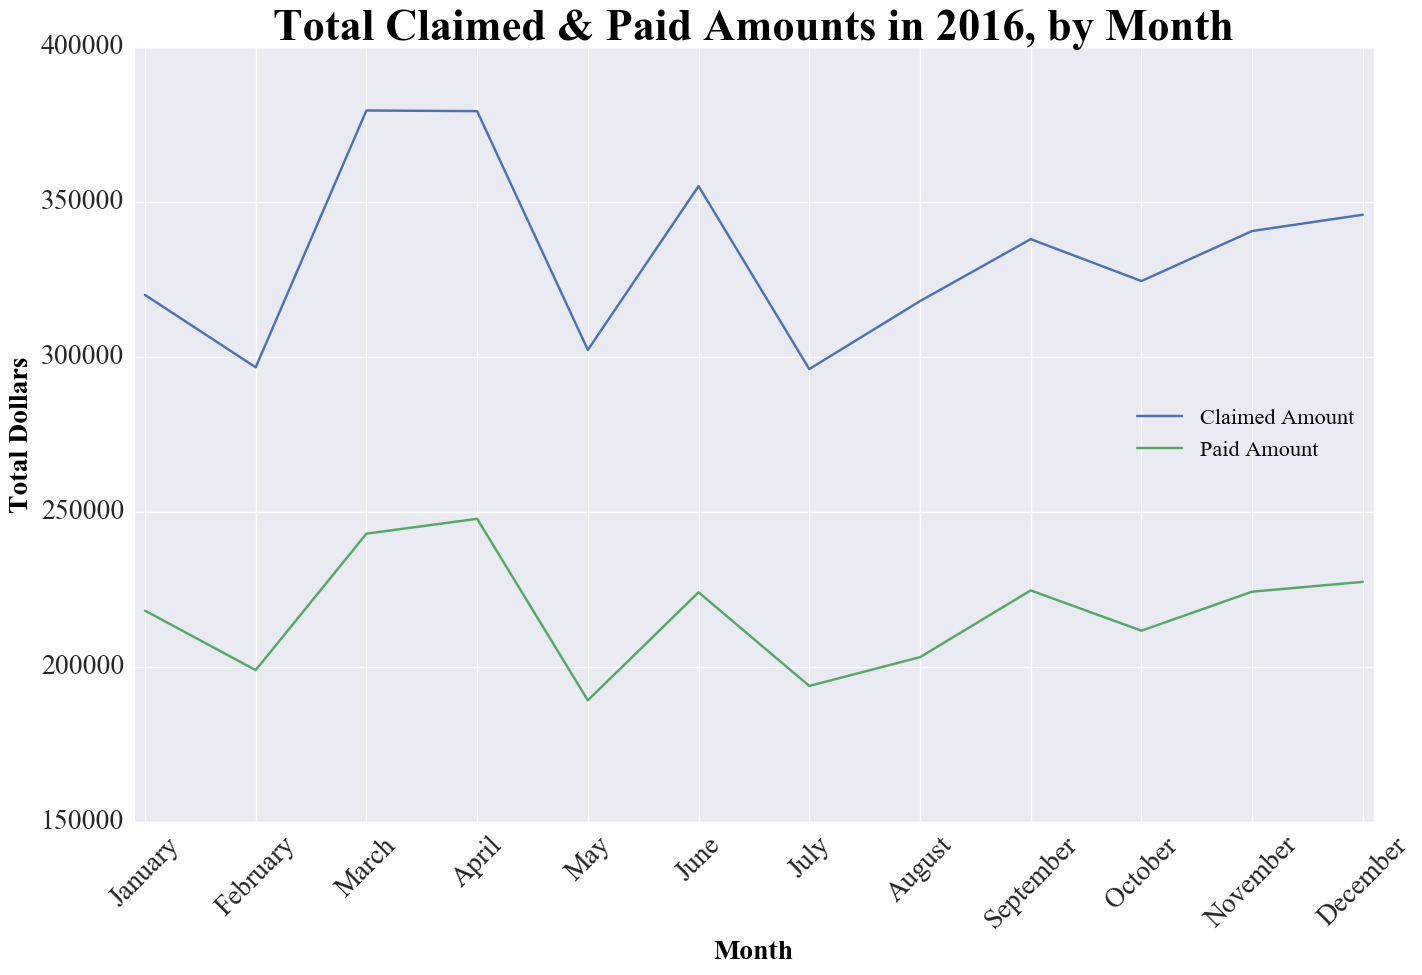

In [24]:
plt_format()

plt.plot(np.sum(wide_df, axis=0).ClaimedAmount, label='Claimed Amount')
plt.plot(np.sum(wide_df, axis=0).PaidAmount, label='Paid Amount')
plt.title('Total Claimed & Paid Amounts in 2016, by Month')
plt.xlim(0.9, 12.1)
plt.xlabel('Month')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 
            'March', 'April', 'May', 'June', 'July', 'August', 
            'September', 'October', 'November', 'December'], rotation=45)
plt.ylabel('Total Dollars')
plt.legend(loc=5);

C:\Users\hms_9\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


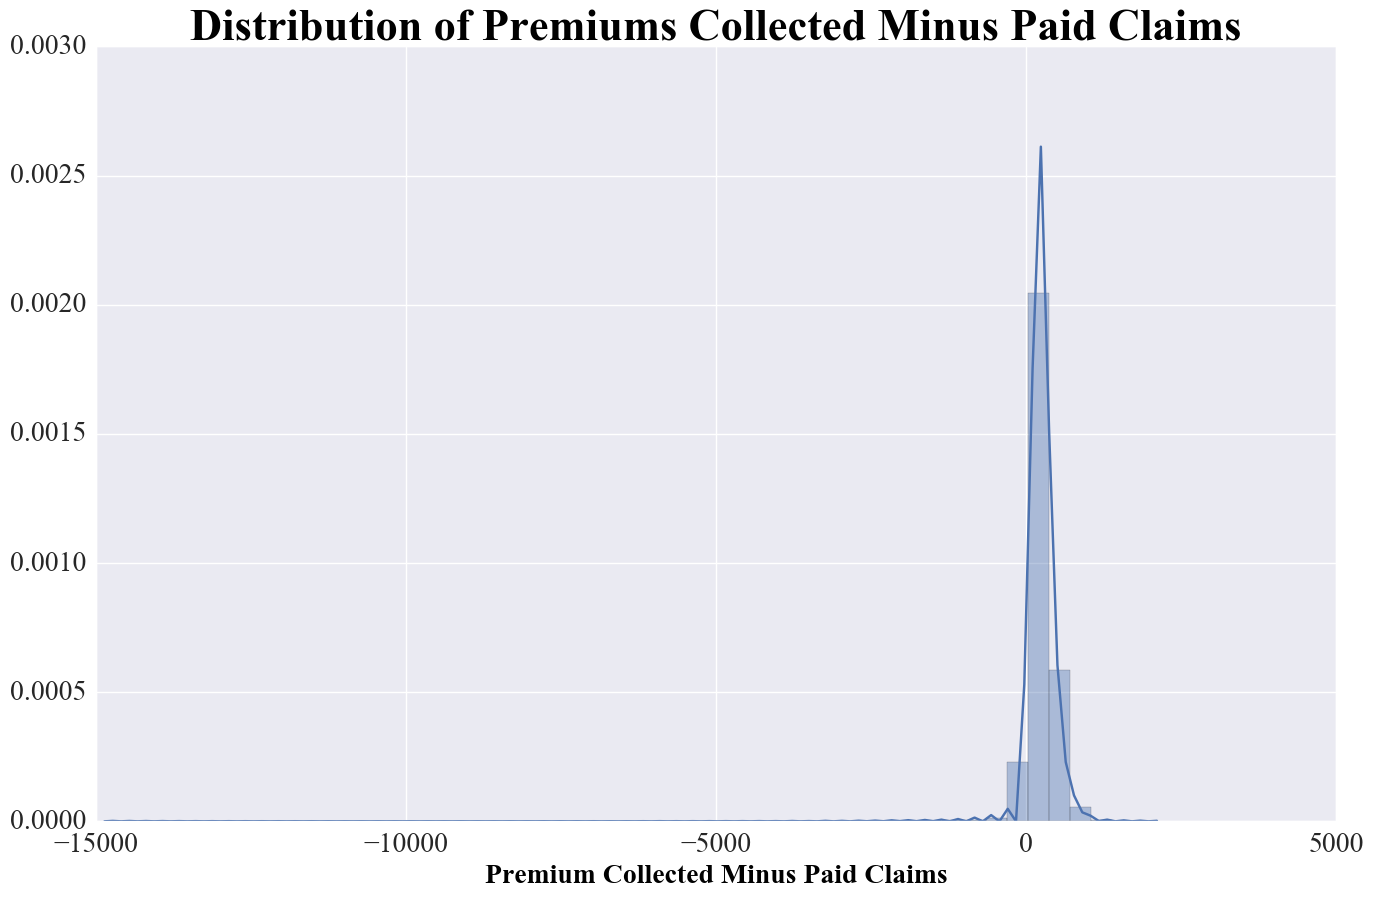

In [25]:
plt_format()

sns.distplot(paid_df.PremiumVPaid.astype(int))
plt.title('Distribution of Premiums Collected Minus Paid Claims')
plt.xlabel('Premium Collected Minus Paid Claims');

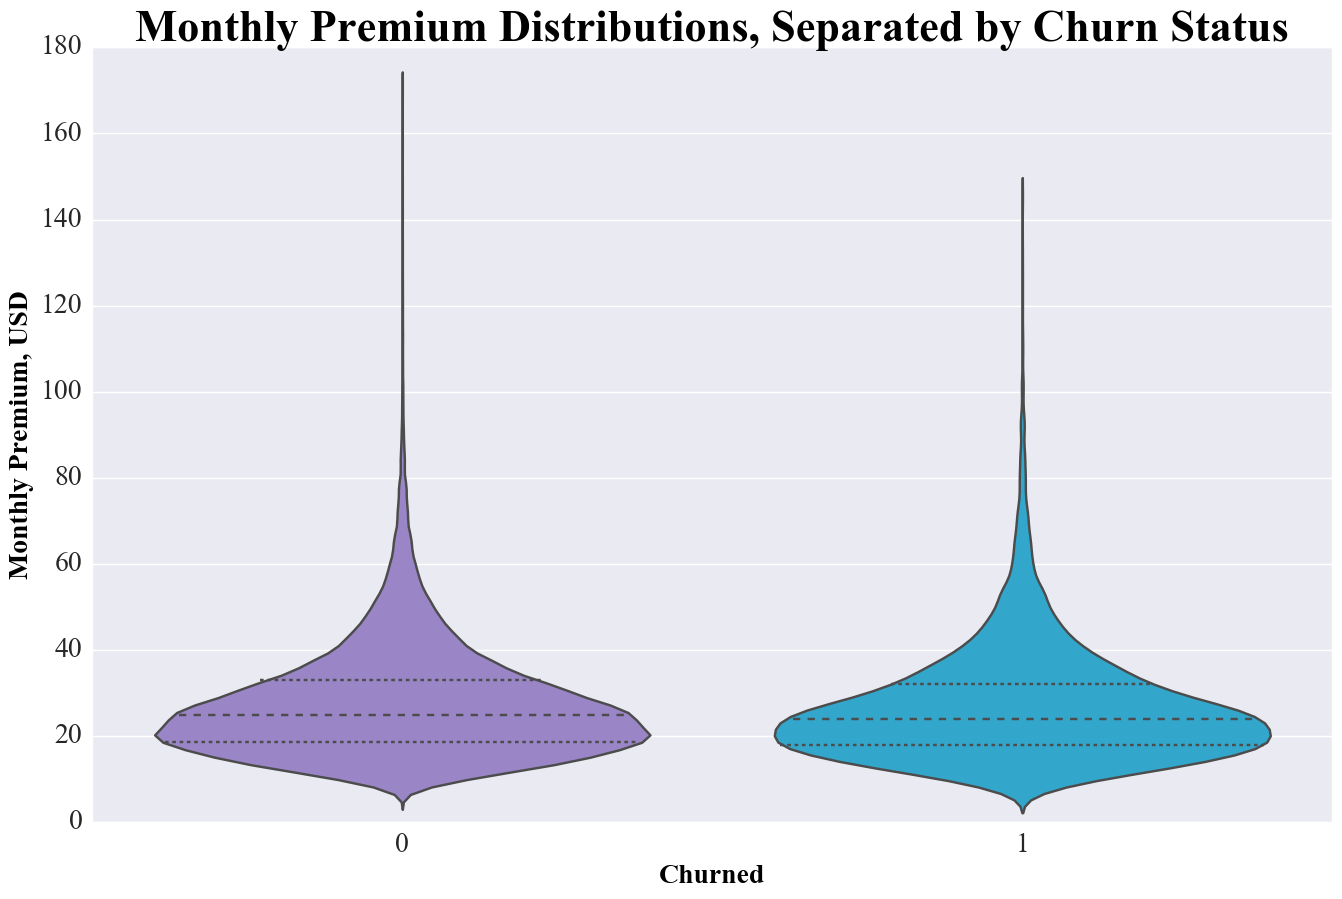

In [26]:
## DATA DISTRIBUTION COMPARISONS:

plt_format()

sns.violinplot(x='Churned', y='MonthlyPremium ', data=write_out, 
               split=True, inner='quartile', saturation=0.6, 
               palette={1: "deepskyblue", 0: "mediumpurple"})
plt.title('Monthly Premium Distributions, Separated by Churn Status')
plt.xlabel('Churned')
plt.ylabel('Monthly Premium, USD')

plt.ylim(0, 180);

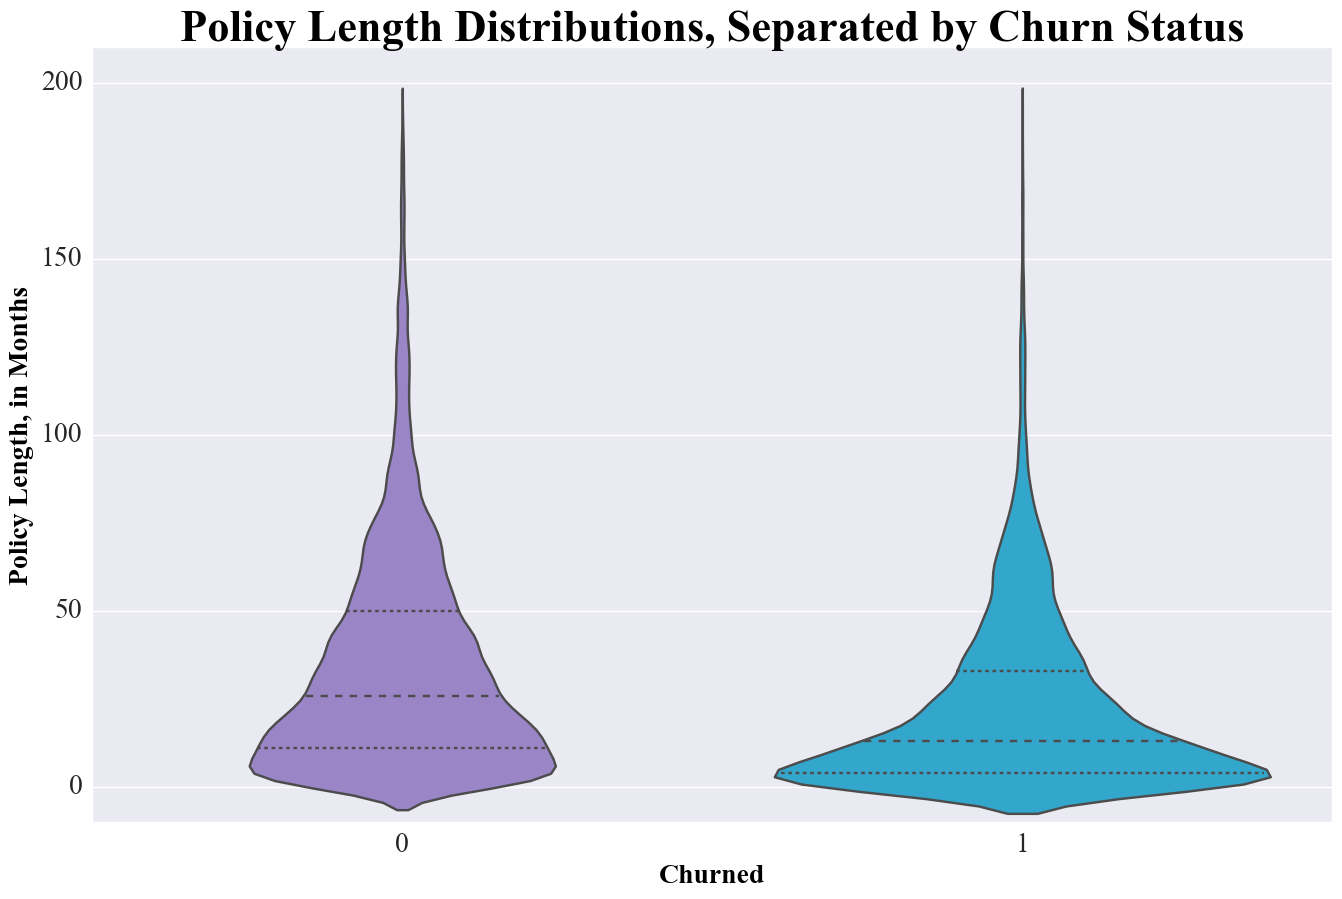

In [27]:
## DATA DISTRIBUTION COMPARISONS:

plt_format()

sns.violinplot(x='Churned', y='PolicyLength', 
               data=write_out, split=True, inner='quartile', saturation=0.6, 
               palette={1: "deepskyblue", 0: "mediumpurple"})
plt.title('Policy Length Distributions, Separated by Churn Status')
plt.xlabel('Churned')
plt.ylabel('Policy Length, in Months')

plt.ylim(-10, 210);

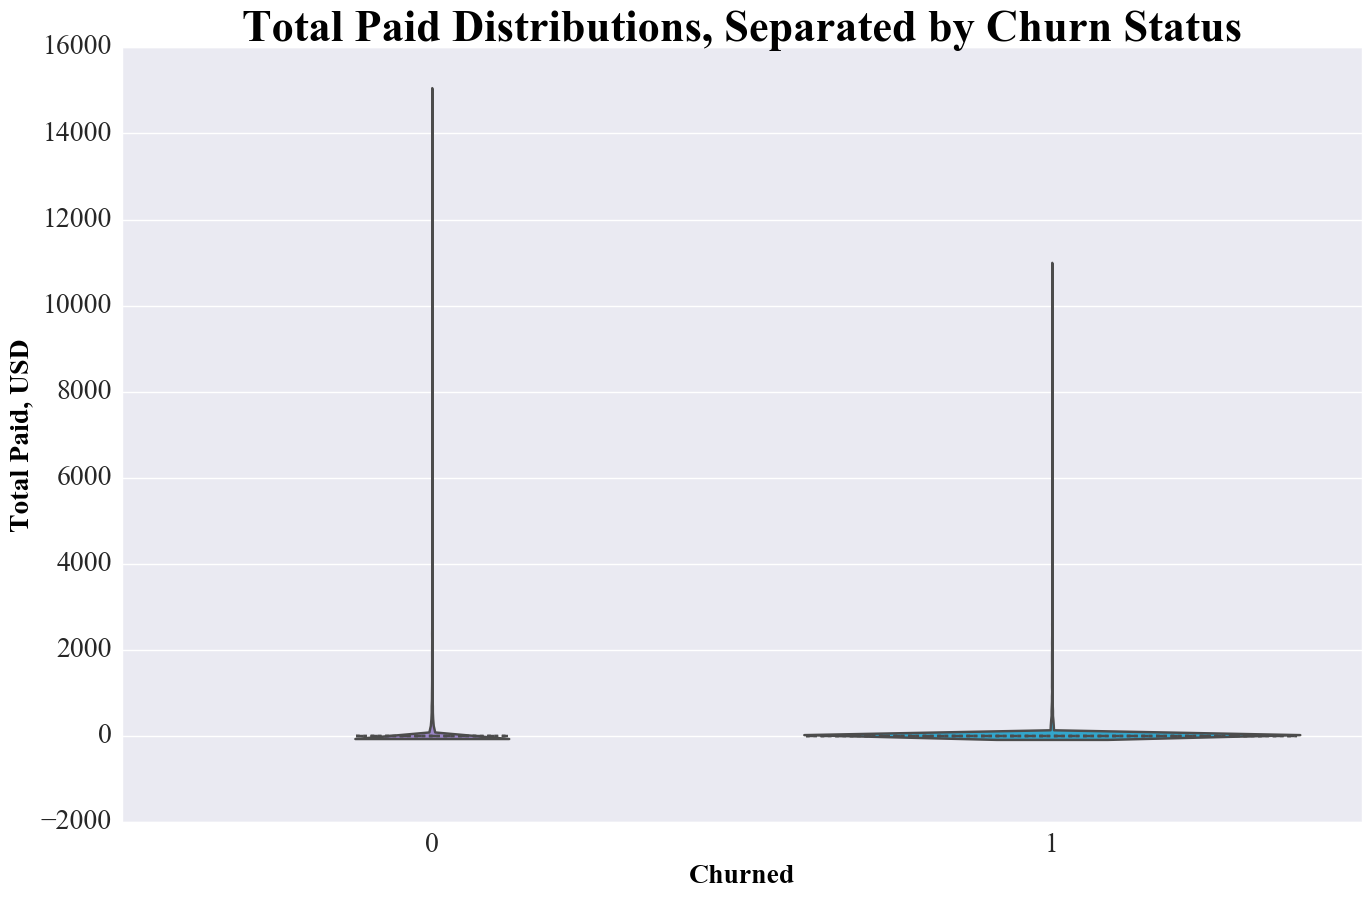

In [28]:
## DATA DISTRIBUTION COMPARISONS:

plt_format()

sns.violinplot(x='Churned', y='TotalPaid', 
               data=write_out, split=True, inner='quartile', saturation=0.6, 
               palette={1: "deepskyblue", 0: "mediumpurple"})
plt.title('Total Paid Distributions, Separated by Churn Status')
plt.xlabel('Churned')
plt.ylabel('Total Paid, USD');

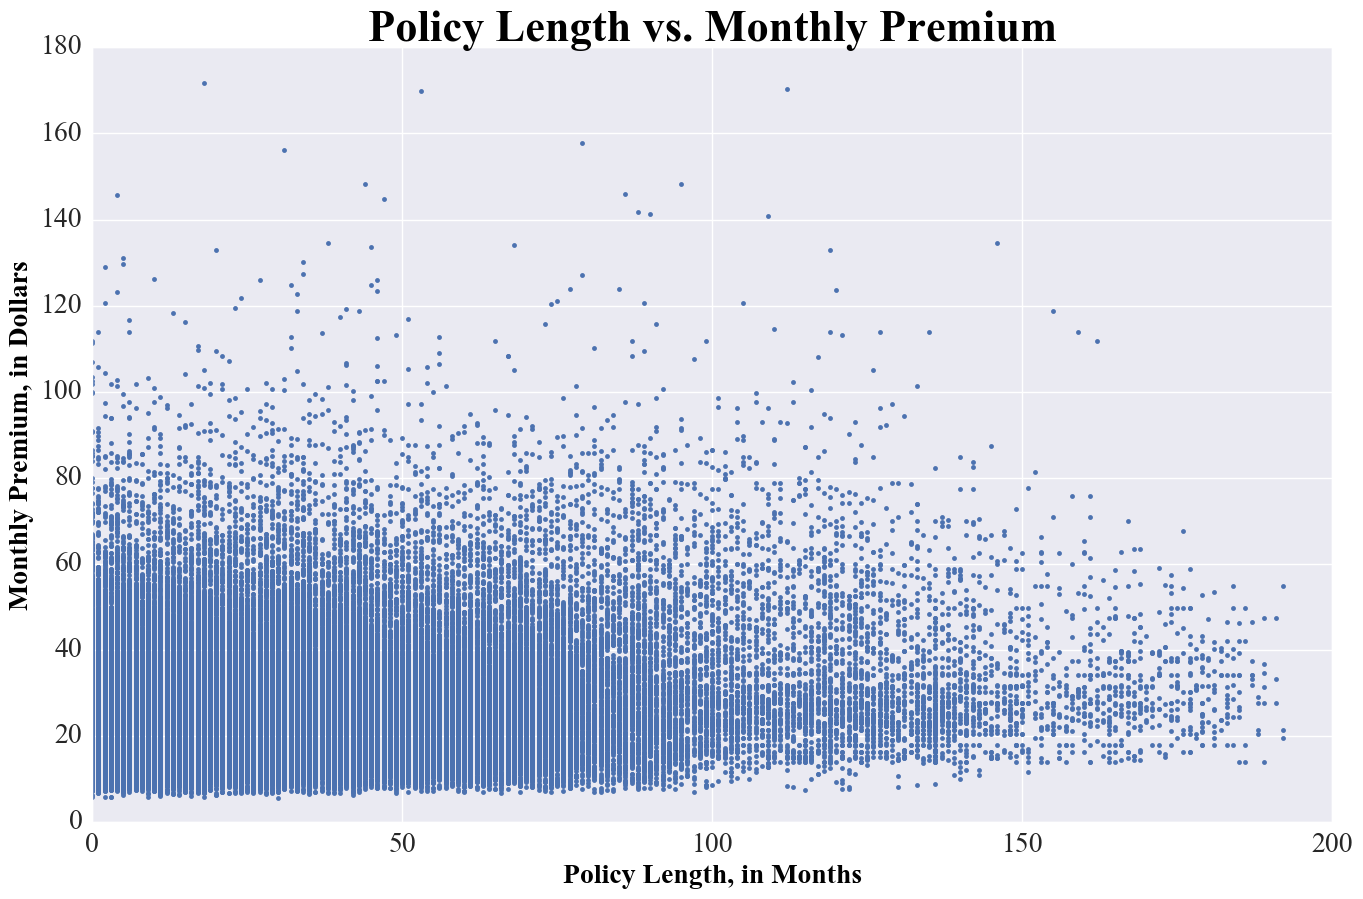

In [29]:
plt_format()

plt.plot(paid_df.PolicyLength, paid_df.MonthlyPremium, '.')
plt.title('Policy Length vs. Monthly Premium')
plt.xlabel('Policy Length, in Months')
plt.ylabel('Monthly Premium, in Dollars');

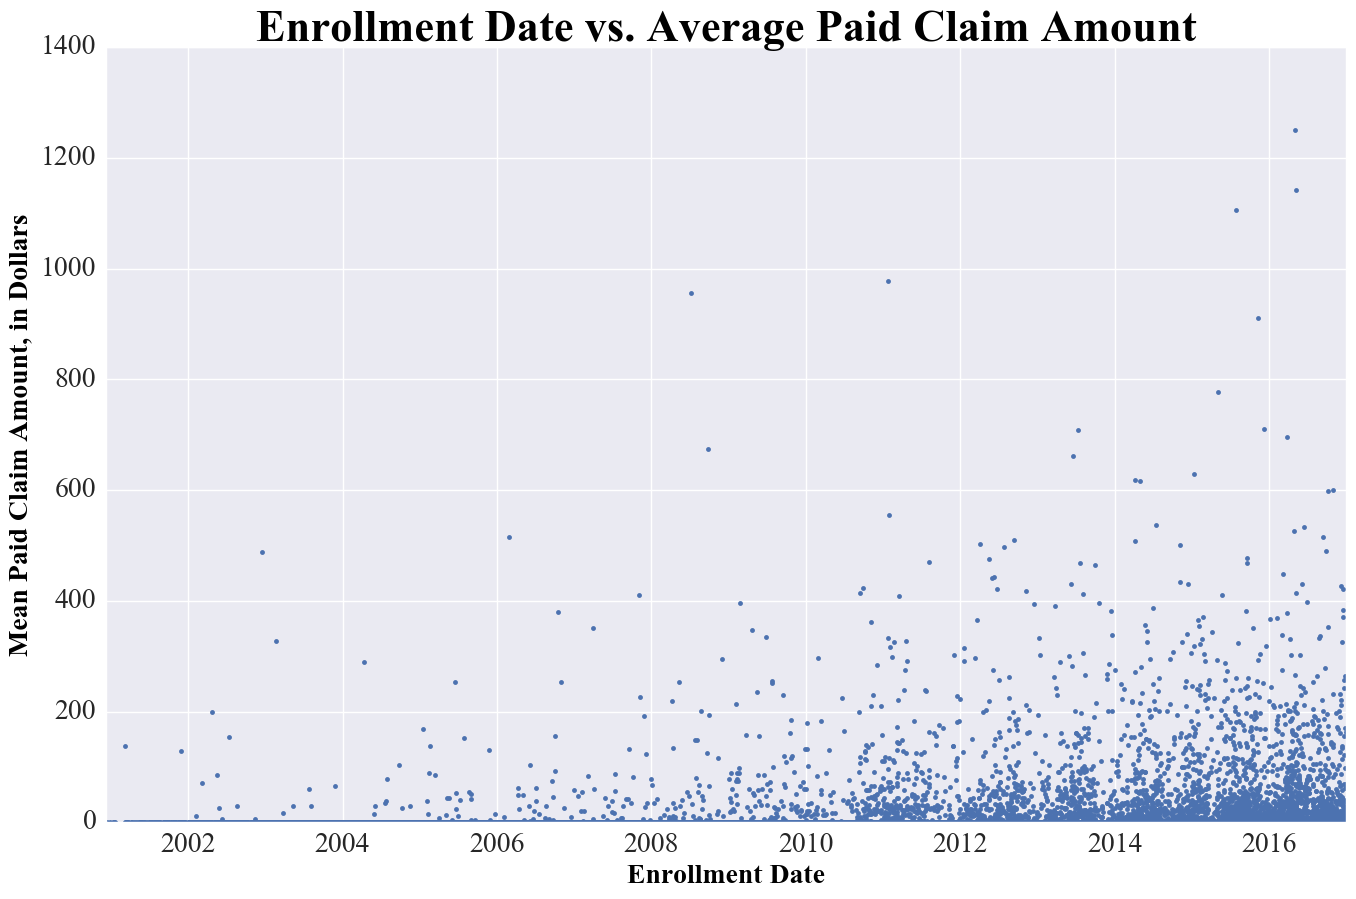

In [30]:
plt_format()

plt.plot(paid_df.EnrollDate, paid_df.MeanPaid, '.')
plt.title('Enrollment Date vs. Average Paid Claim Amount')
plt.xlabel('Enrollment Date')
plt.ylabel('Mean Paid Claim Amount, in Dollars');

C:\Users\hms_9\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


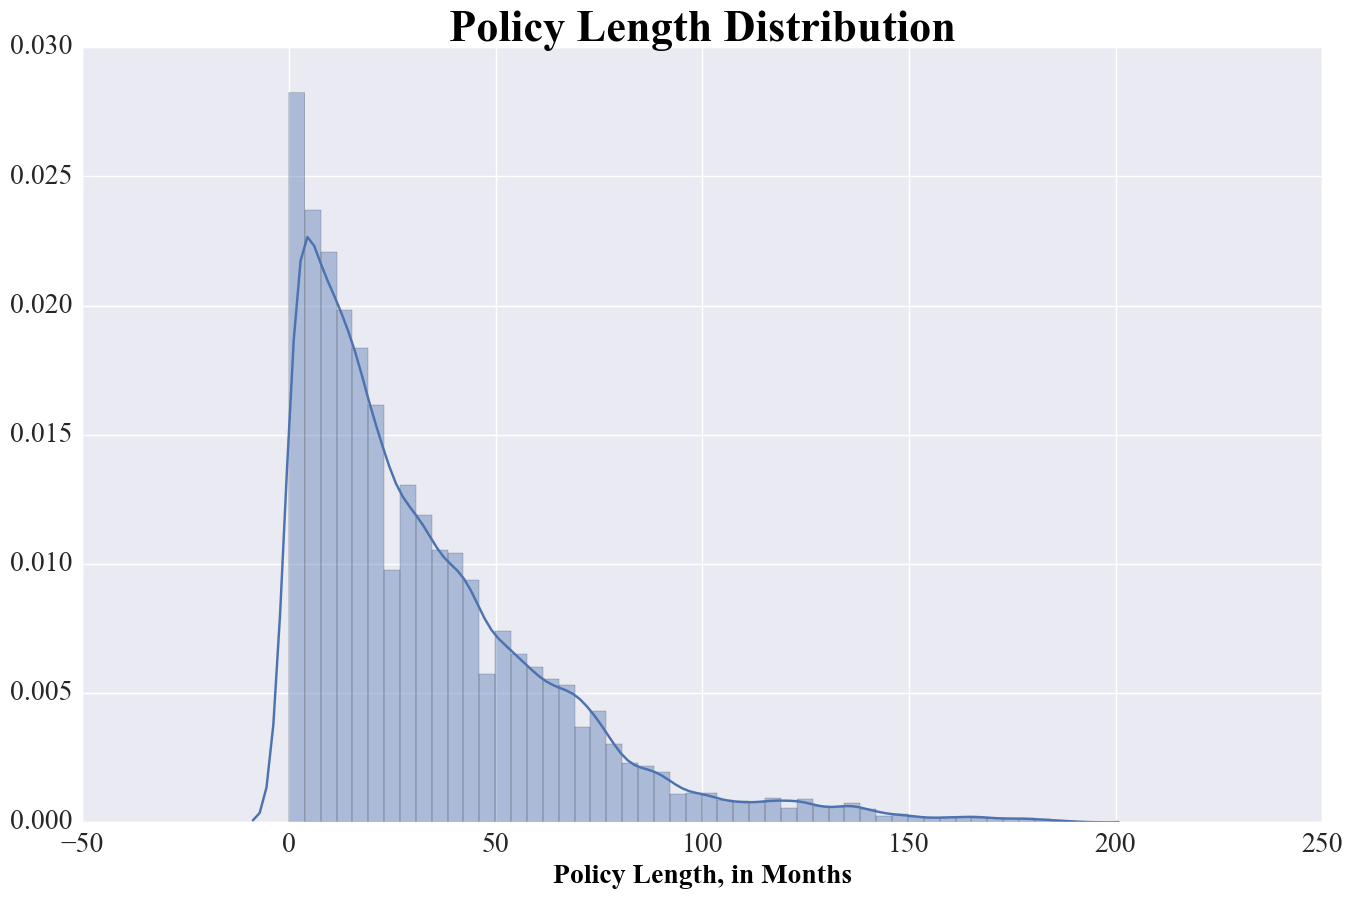

In [31]:
plt_format()

sns.distplot(paid_df.PolicyLength.astype(int))
plt.title('Policy Length Distribution')
plt.xlabel('Policy Length, in Months');

---  
  
---  
  
---  
  
  
## Model: Predicting Cancellation Probabilities 
  
 - First, run through a trial model to get an idea of how model will perform

In [32]:
## DEFINE MODEL INPUT FEATURES & OUTPUT:

df = cancel_df.copy(deep=True)

input_features = ['ClaimedAmount', 'MonthlyPremium', 'PaidAmount', 
                  'MeanClaims', 'MeanPaid', 'MedianClaims', 
                  'MedianPaid', 'TotalClaims', 'TotalPaid', 
                  'TotalDifference', 'Premiums2016', 'PremiumsPaid2016', 
                  'PremiumVPaid', 'PolicyLength']
output_feature = 'Churned'

X = df[input_features]
y = df[output_feature]

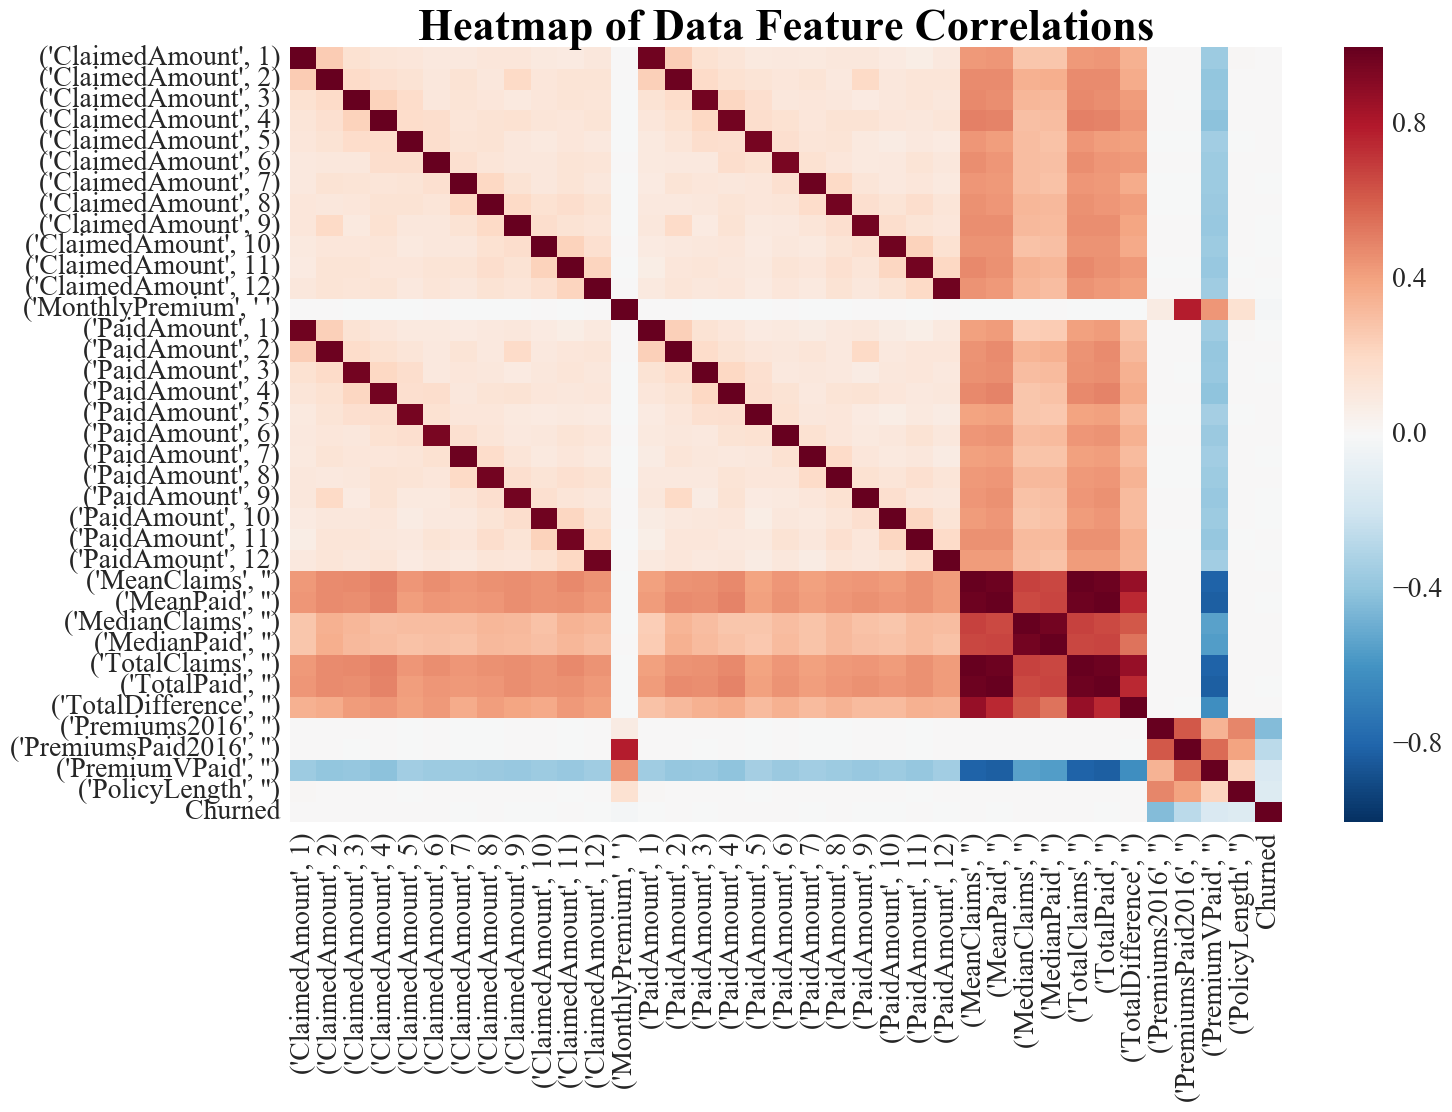

In [33]:
plt_format()

sns.heatmap(pd.concat([pd.DataFrame(X), y], axis=1).corr())
plt.title('Heatmap of Data Feature Correlations');

In [34]:
## RANDOM FOREST MODELING:

# Split into training & test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
# Scale the data to a mean of '0' and standard deviation of '1'
# Scaling the test data on the training set:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
      
# Initialize a classifier:
clf = RF(n_estimators=10, criterion='entropy')
clf.fit(X_train, y_train)
# Predict classes:
y_pred = clf.predict(X_test)
# Predict probabilities:
y_prob = clf.predict_proba(X_test)
    
# Print the accuracy:
accuracy = clf.score(X_test, y_test)
print("  Accuracy: ", accuracy*100, '%\n')

print('  Model Statistics:')
confusion_matrices = ConfusionMatrix(y_test, y_pred)
confusion_matrices.print_stats()

  Accuracy:  94.316 %

  Model Statistics:
population: 6217
P: 881
N: 5336
PositiveTest: 742
NegativeTest: 5475
TP: 102
TN: 4696
FP: 640
FN: 779
TPR: 0.115777525539
TNR: 0.880059970015
PPV: 0.137466307278
NPV: 0.857716894977
FPR: 0.119940029985
FDR: 0.862533692722
FNR: 0.884222474461
ACC: 0.771754865691
F1_score: 0.125693160813
MCC: -0.00447771616219
informedness: -0.00416250444585
markedness: -0.0048167977452
prevalence: 0.141708219398
LRP: 0.965295119183
LRN: 1.00472979636
DOR: 0.960750962773
FOR: 0.142283105023


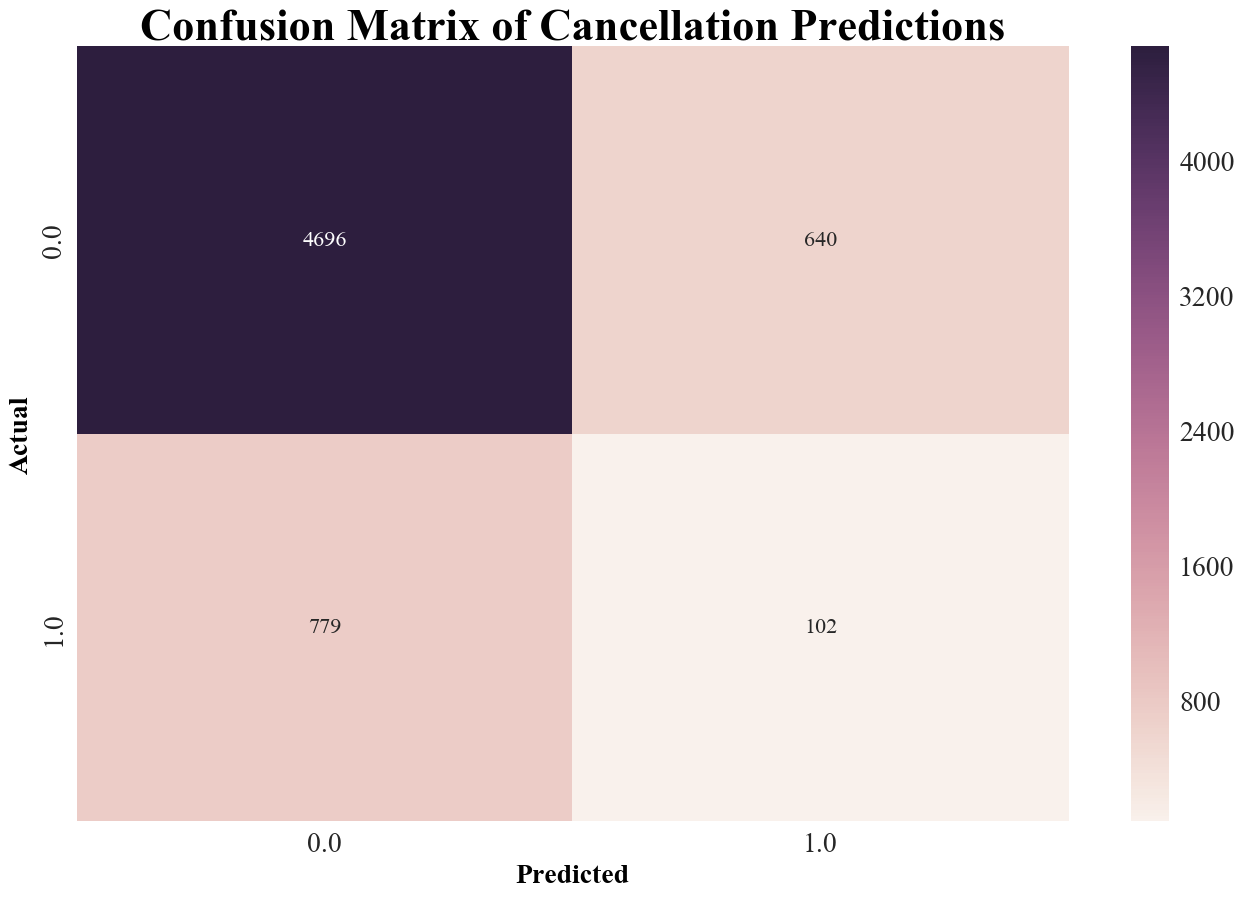

In [35]:
plt_format()

confusion_matrices.plot(backend='seaborn', annot=True, fmt=".0f")
plt.title('Confusion Matrix of Cancellation Predictions');

In [36]:
## EVALUATE PROBABILITY PREDICTIONS:

# Number of times a predicted probability is assigned to an observation:
counts = pd.value_counts(y_prob[:, 1])
is_churn = y_test == 1

# Calculate true probabilities:
true_prob = {}
for prob in counts.index:
    true_prob[prob] = np.mean(is_churn[y_prob[:, 1] == prob])
    true_prob = pd.Series(true_prob)

# Reshape & rename:
counts = pd.concat([counts, true_prob], axis=1).reset_index()
counts.columns = ['pred_prob', 'count', 'true_prob']

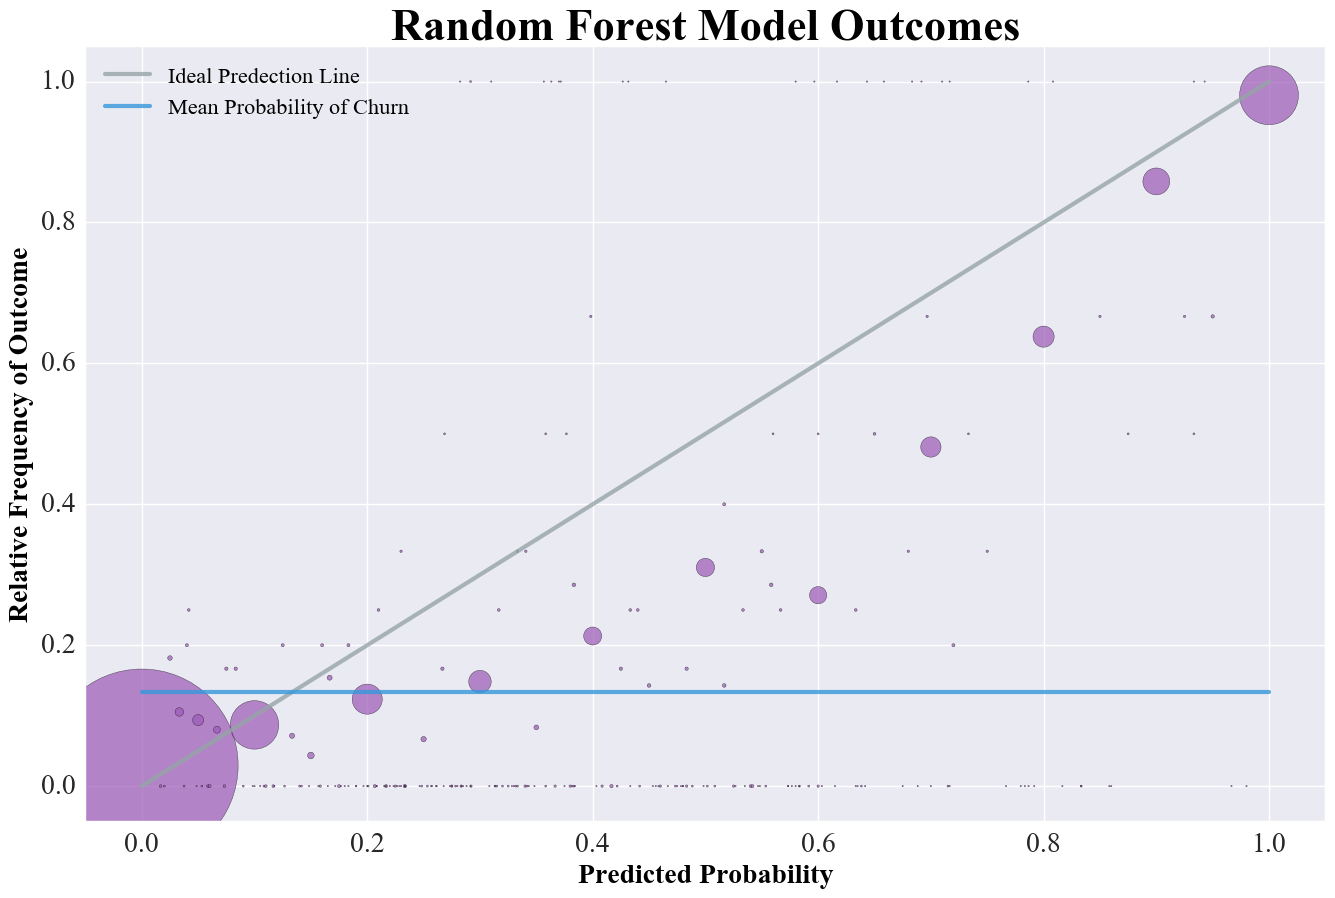

In [37]:
plt_format()

baseline = np.mean(is_churn)

plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), 
         c="#95a5a6", linewidth=3, alpha=0.8, label='Ideal Predection Line')
plt.plot(np.linspace(0, 1, 10), np.linspace(baseline, baseline, 10), 
         c="#3498db", linewidth=3, alpha=0.8, label='Mean Probability of Churn')
plt.scatter(data=counts, x='pred_prob', y='true_prob', s='count', 
            marker='o', label=None, alpha=0.7, c="#9b59b6")
plt.title("Random Forest Model Outcomes")
plt.xlabel("Predicted Probability")
plt.ylabel("Relative Frequency of Outcome")
plt.xlim(-0.05,  1.05)
plt.ylim(-0.05, 1.05)
plt.legend(loc=2);

,Predicted False,Predicted True
Actual False,21158,503
Actual True,918,2421


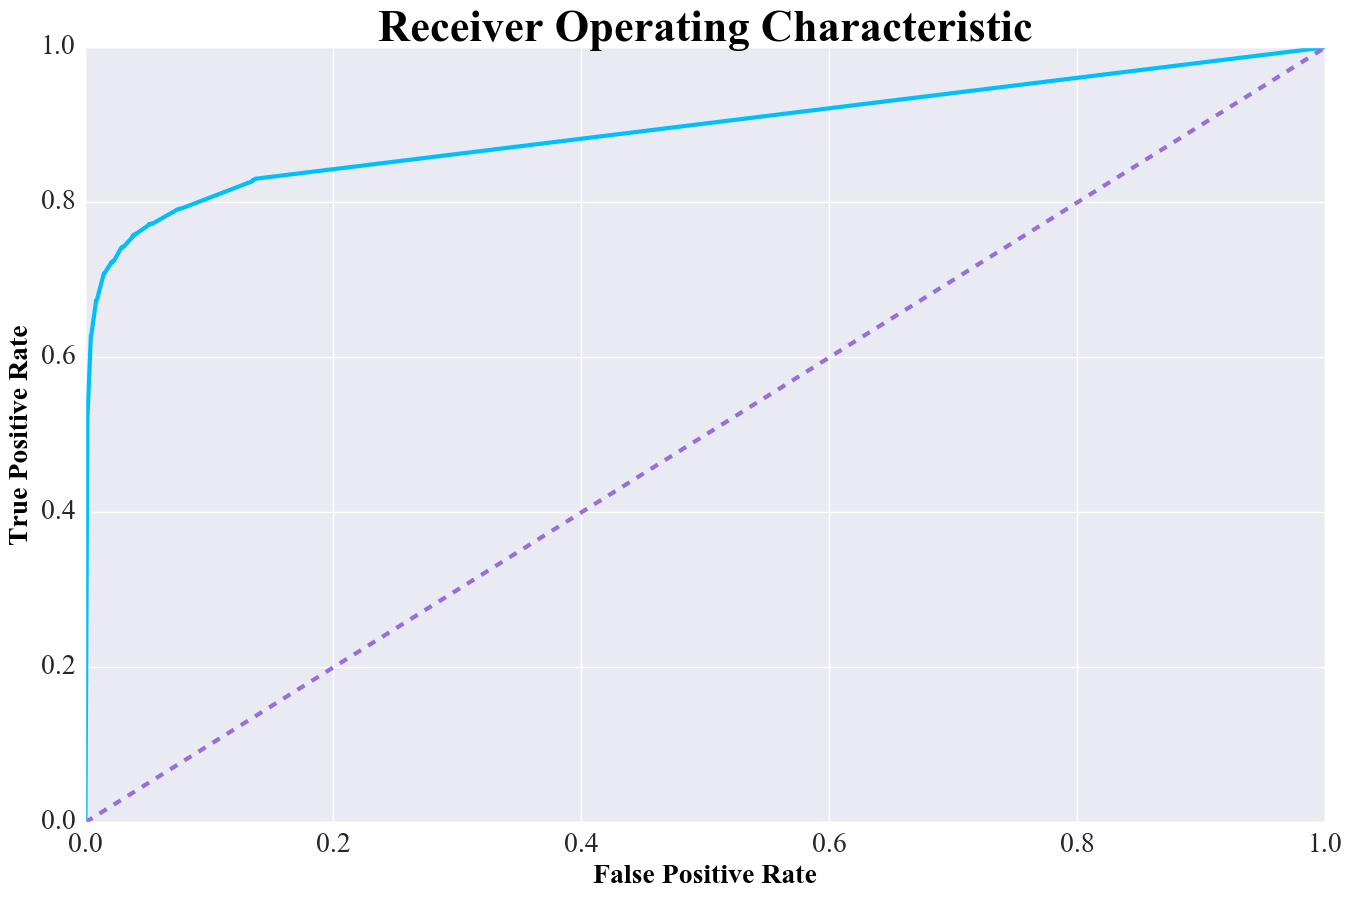

In [38]:
plt_format()

conf_mat = pd.DataFrame(
    confusion_matrix(y_test.values, y_pred), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
display(conf_mat)

# Calculate the false positives & true positives for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, y_prob[:, 1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color='deepskyblue', linewidth=3)
plt.plot([0, 1], [0, 1], '--', color='mediumpurple', linewidth=3)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

,Importance,Labels
32,0.277456,"(Premiums2016, )"
35,0.264762,"(PolicyLength, )"
12,0.159510,"(MonthlyPremium, )"
33,0.154197,"(PremiumsPaid2016, )"
34,0.122951,"(PremiumVPaid, )"


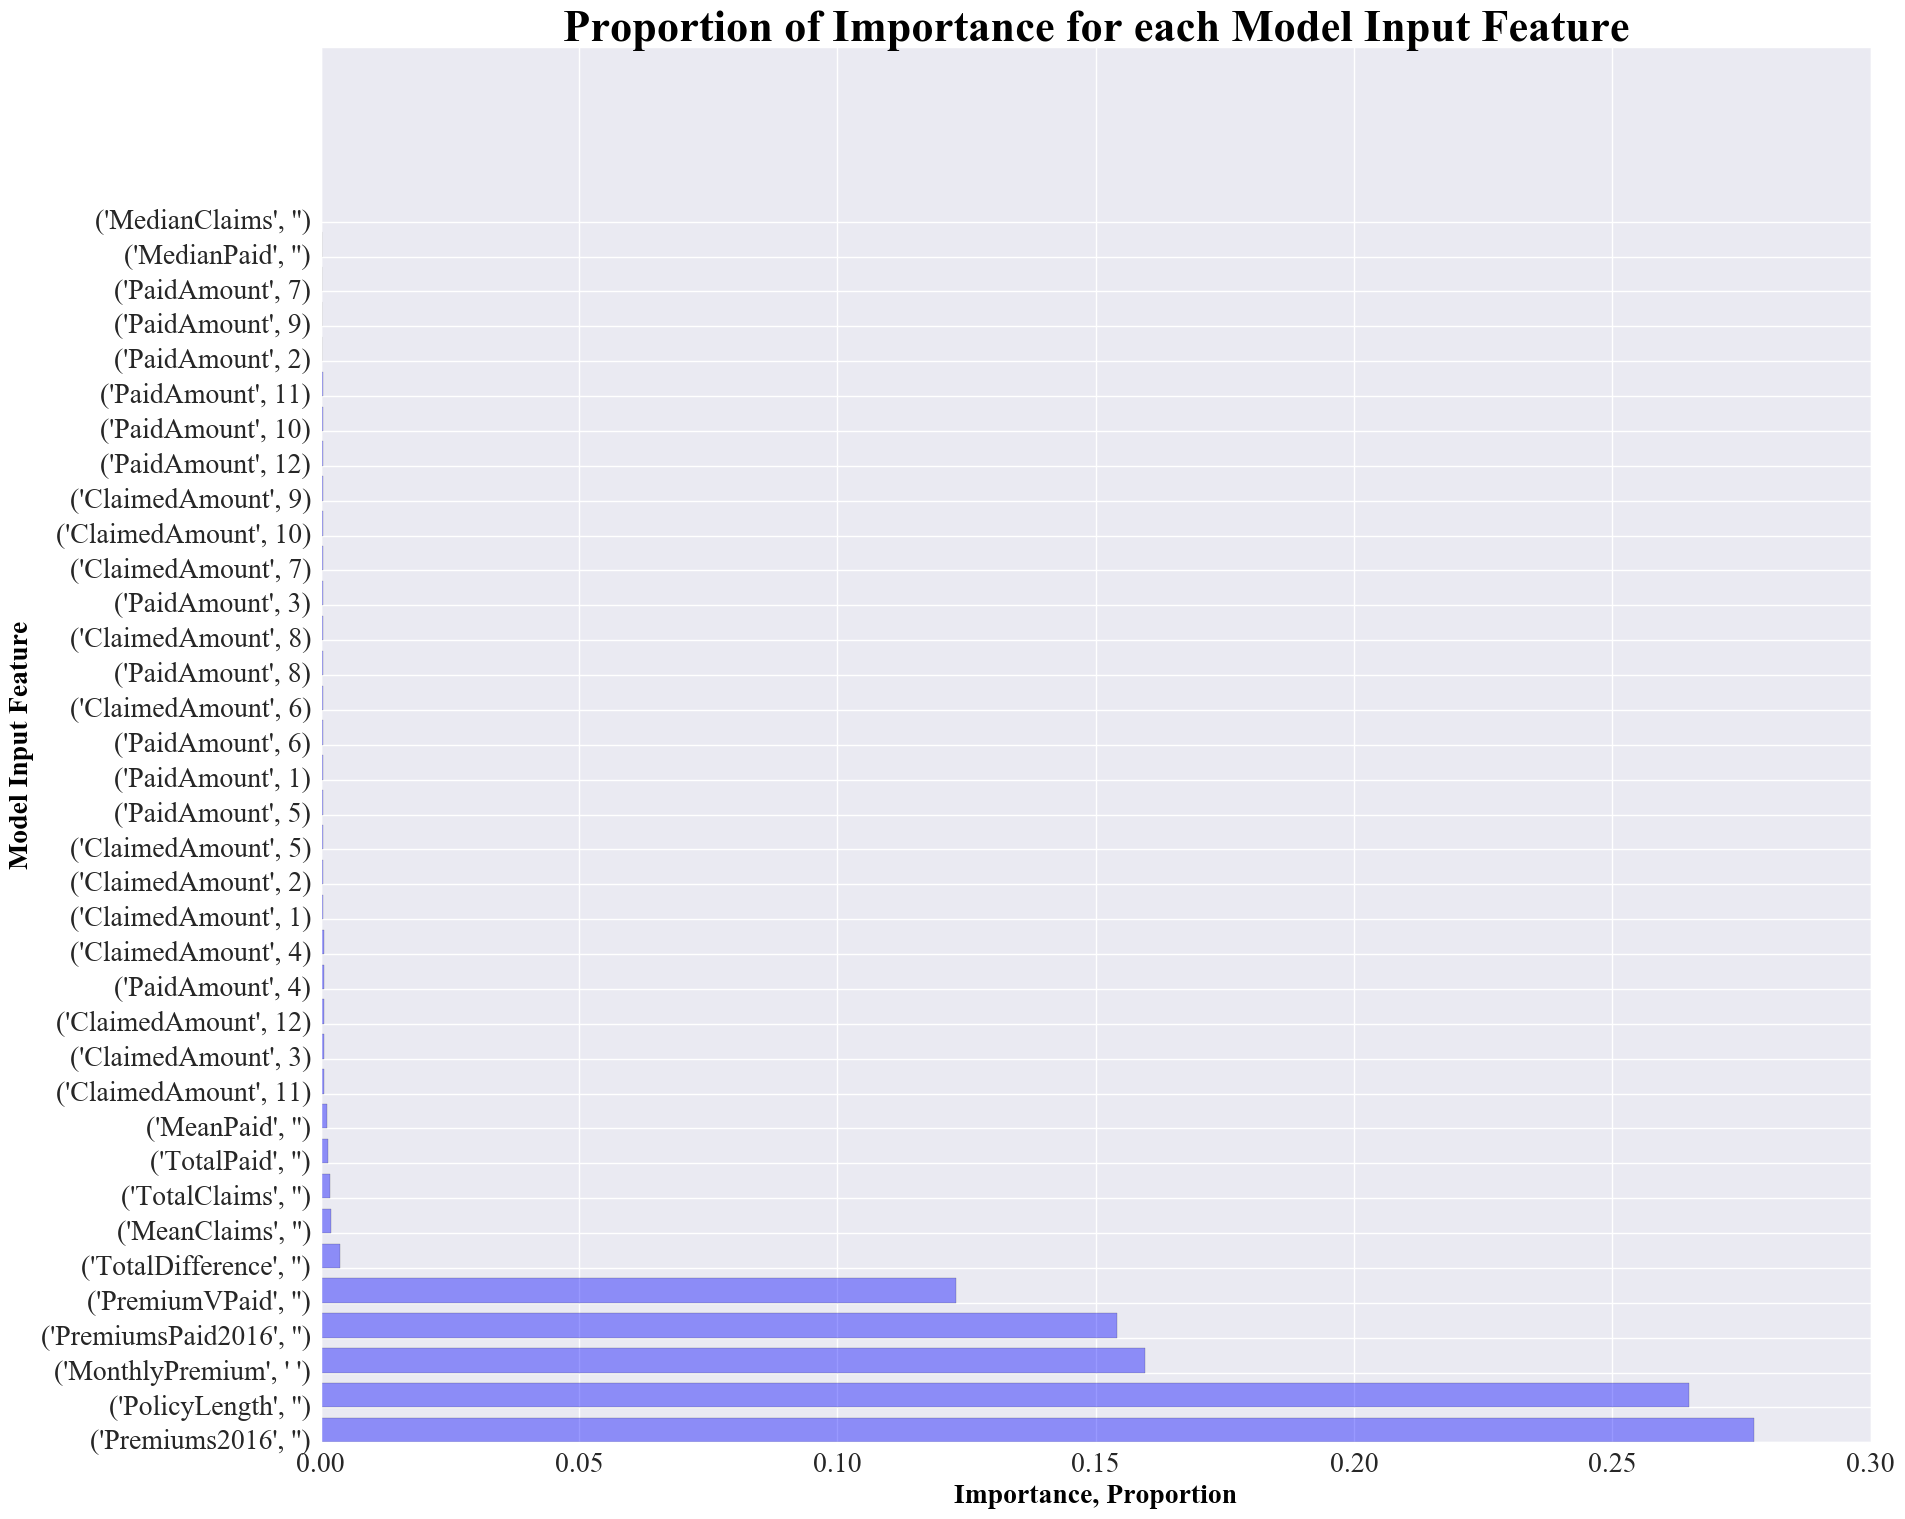

In [39]:
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(clf.feature_importances_, columns=["Importance"])
df_f["Labels"] = df[input_features].columns
df_f.sort_values("Importance", inplace=True, ascending=False)
display(df_f.head(5))

index = np.arange(len(clf.feature_importances_))
bar_width = 0.7
rects = plt.barh(index , df_f["Importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_f["Labels"])
plt.title('Proportion of Importance for each Model Input Feature')
plt.xlabel('Importance, Proportion')
plt.ylabel('Model Input Feature')
plt.show()

In [40]:
## PREVIEW CHURN PROBABILITIES:

pd.DataFrame(y_prob).iloc[:, 1].head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.1
8    0.1
9    0.0
Name: 1, dtype: float64

---  
  
- Final cancellation prediction model

In [41]:
## RANDOM FOREST MODELING; TRAIN FINAL MODEL WITH OUTPUT:

# Scale the data to a mean of '0' and standard deviation of '1':
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
      
# Initialize a classifier:
clf = RF(n_estimators=4, criterion='entropy', random_state=None)
clf.fit(X, y)
# Predict classes:
y_pred = clf.predict(X)
# Predict probabilities:
y_prob = clf.predict_proba(X)
    
# Print the accuracy:
accuracy = clf.score(X, y)
print("  Accuracy: ", accuracy*100, '%\n')

print('  Model Statistics:')
confusion_matrices = ConfusionMatrix(y, y_pred)
confusion_matrices.print_stats()

  Accuracy:  97.8 %

  Model Statistics:
population: 100000
P: 13196
N: 86804
PositiveTest: 11938
NegativeTest: 88062
TP: 2777
TN: 77643
FP: 9161
FN: 10419
TPR: 0.210442558351
TNR: 0.894463388784
PPV: 0.232618529067
NPV: 0.881685630578
FPR: 0.105536611216
FDR: 0.767381470933
FNR: 0.789557441649
ACC: 0.8042
F1_score: 0.22097557094
MCC: 0.109504274478
informedness: 0.104905947135
markedness: 0.114304159645
prevalence: 0.13196
LRP: 1.99402421516
LRN: 0.882716331993
DOR: 2.25896377227
FOR: 0.118314369422


In [42]:
## EVALUATE PROBABILITY PREDICTIONS:

# Number of times a predicted probability is assigned to an observation:
counts = pd.value_counts(y_prob[:, 1])
is_churn = y == 1

# Calculate true probabilities:
true_prob = {}
for prob in counts.index:
    true_prob[prob] = np.mean(is_churn[y_prob[:, 1] == prob])
    true_prob = pd.Series(true_prob)

# Reshape & rename:
counts = pd.concat([counts, true_prob], axis=1).reset_index()
counts.columns = ['pred_prob', 'count', 'true_prob']

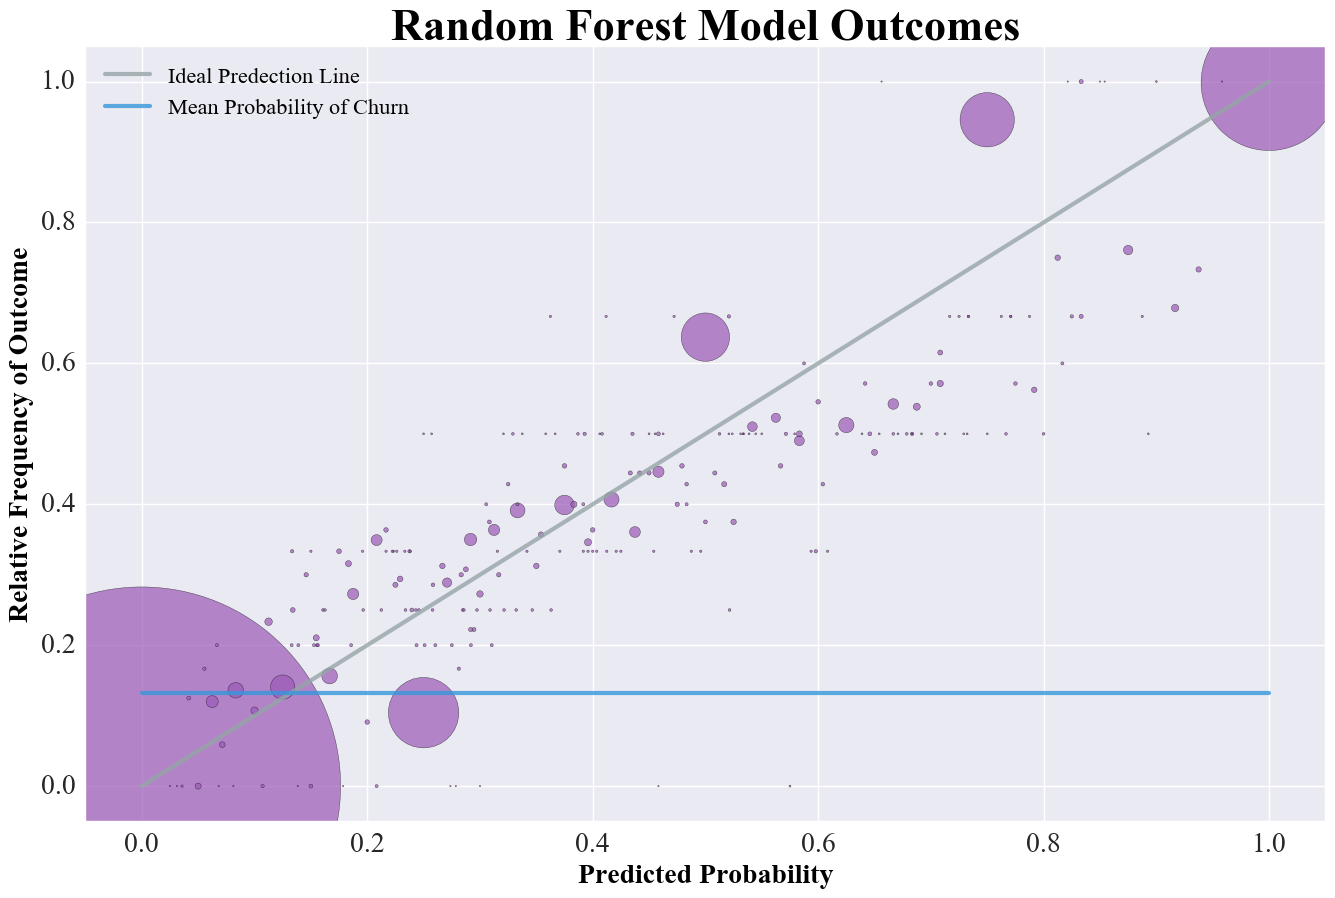

In [43]:
## PLOT PREDICTION COUNTS:

plt_format()

baseline = np.mean(is_churn)

plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), 
         c="#95a5a6", linewidth=3, alpha=0.8, label='Ideal Predection Line')
plt.plot(np.linspace(0, 1, 10), np.linspace(baseline, baseline, 10), 
         c="#3498db", linewidth=3, alpha=0.8, label='Mean Probability of Churn')
plt.scatter(data=counts, x='pred_prob', y='true_prob', s='count', 
            marker='o', label=None, alpha=0.7, c="#9b59b6")
plt.title("Random Forest Model Outcomes")
plt.xlabel("Predicted Probability")
plt.ylabel("Relative Frequency of Outcome")
plt.xlim(-0.05,  1.05)
plt.ylim(-0.05, 1.05)
plt.legend(loc=2);

In [44]:
## WRITE OUT CANCELLATION PROBABILITIES:

cancel_probs = pd.DataFrame(y_prob).iloc[:, 1]
cancel_probs = pd.concat([df.PolicyId, cancel_probs], axis=1)
cancel_probs.columns = ['PolicyId', 'CancelProb']
cancel_probs.to_csv('./Data/CancellationProbabilities.csv', index=False)

---  
  
---  
  
### In conclusion, 

#### Thank you very much for considering me for the Data Scientist position at Trupanion!  I know your time is valuable, and I hope that you find my thorough answers helpful in assessing my mental processes.  I look forward to hearing from you soon!

**Regards,**  
**Heather M. Steich, M.S.**

Contact Info:
  - Phone: 925-321-3997  
  - Email: [hms_945@yahoo.com](mailto:hms_945@yahoo.com)  
  - LinkedIn: [HeatherSteich](https://www.linkedin.com/in/heathersteich)  
  - Github: [hsteich](https://www.github.com/hsteich)  
  - YouTube Channel: [DataScienceBrushUp](https://www.youtube.com/channel/UCPxg-VShHJ19t3IwnS1mMMQ)